In [1]:
import longi_class as lc
import analysis_functions as af
import matplotlib.pyplot as plt
import matplotlib
import longitudinal_functions as lf
import numpy as np
import pickle
import plotting_functions as pf
import os

In [10]:
males= sorted(['4145','4146','4140', '4139', '4142', '4143'])
females = sorted(['4136','784','4096','4148','4144','4147'])

animal_order = males+females
animal_order = [int(el) for el in animal_order]
names = af.assemble_names('/home/dprotter/Downloads/csv')
sum_files = [file for file in sorted(names) if 'summary' in file]


In [4]:

lon_ana = lc.LongitudinalAnalysis('all_exp')

In [5]:
if os.path.exists('/home/dprotter/Downloads/lon_ana.pickle'):
    print('loading data')
    lon_ana = lon_ana.open('/home/dprotter/Downloads/lon_ana.pickle')

loading data


In [6]:

files_to_load = [f for f in sum_files if not f in lon_ana.files]
for f in files_to_load:
    lon_ana.add_summary_csv(f)

In [7]:
lon_ana.save('/home/dprotter/Downloads/lon_ana.pickle')

this path exists and will be overwritten.


In [11]:
mets = lon_ana.metrics
lon_ana.animal_order = animal_order

In [8]:
dataset = lon_ana
met = lon_ana.metrics['total_lever_press'].data
experiment = "Autoshape"
days = None
data = met.loc[met.experiment == experiment]

anis = dataset.animal_order if dataset.animal_order else sorted(data.animal.unique() )

if days == None:
    days = sorted(data.day.unique() )

out = np.empty((len(anis), len(days)))
out[:,:] = np.nan

for i, ani in enumerate(anis):

    ani_slice = data.loc[data.animal == ani]
    
    
    for j, d in enumerate(days):
        if d in ani_slice.day.unique():
            val = ani_slice.loc[ani_slice.day == d, 'value'].values[0]
            
            out[i,j] = val
print(out)

[[ 4.  6. 19. 18.]
 [16. 19. 20. 20.]
 [13. 20. 12.  8.]
 [15. 20. 19. 18.]
 [ 3.  5.  5.  8.]
 [18. 19. 17. 20.]
 [ 9. 18. 19. 19.]
 [15.  9. 19. 19.]
 [19. 20. 20. 20.]
 [ 3.  2.  6.  7.]
 [15. 19. 19. 20.]
 [11. 19. 16. 15.]]


In [14]:
lon_ana.animal_order = animal_order

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python

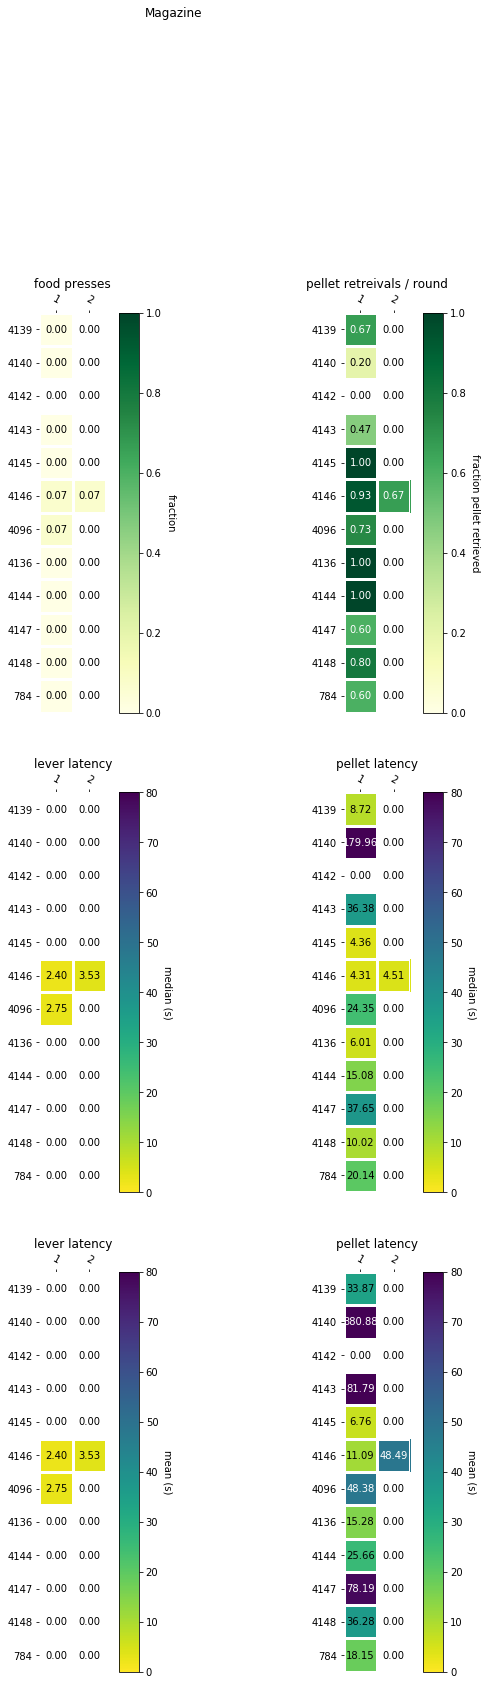

In [25]:
if 'Magazine' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Magazine'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,25)) 


    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)


    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'mean_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)



    metric = 'mean_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

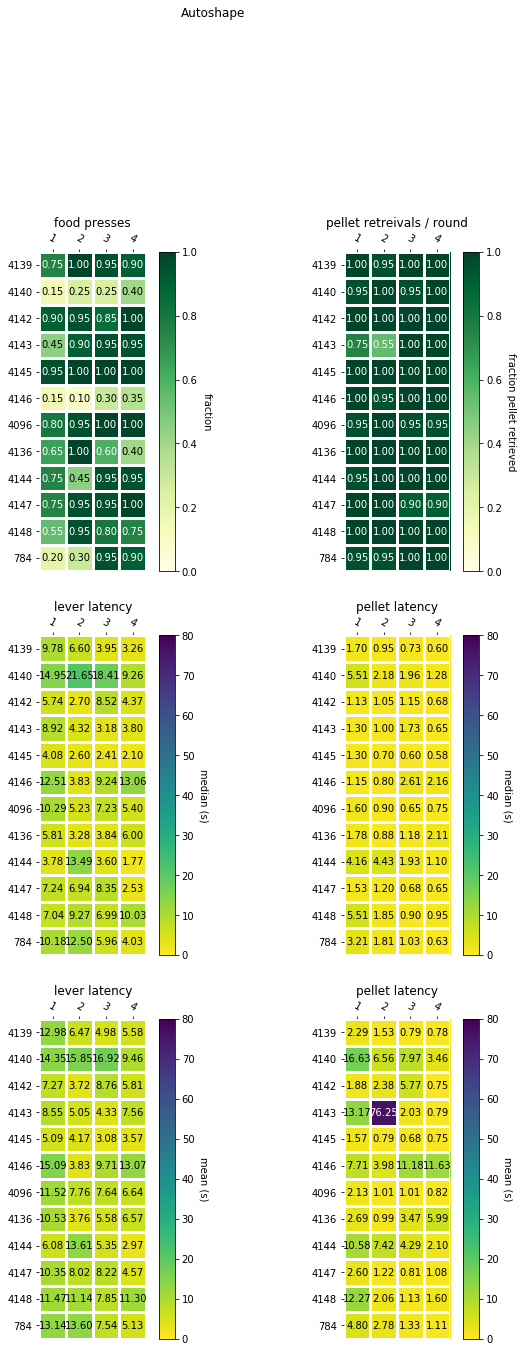

In [24]:

if 'Autoshape' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,20)) 


    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)


    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'mean_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)



    metric = 'mean_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

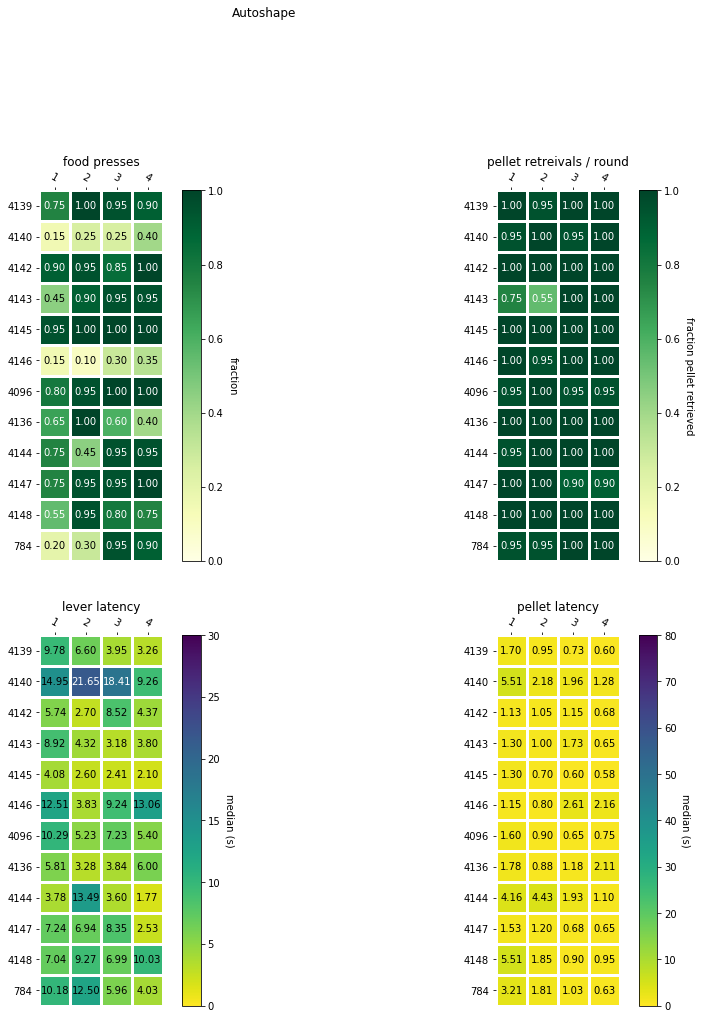

In [12]:
if 'Autoshape' in lon_ana.experiments:
    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (15,15)) 


    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])

    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 30, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

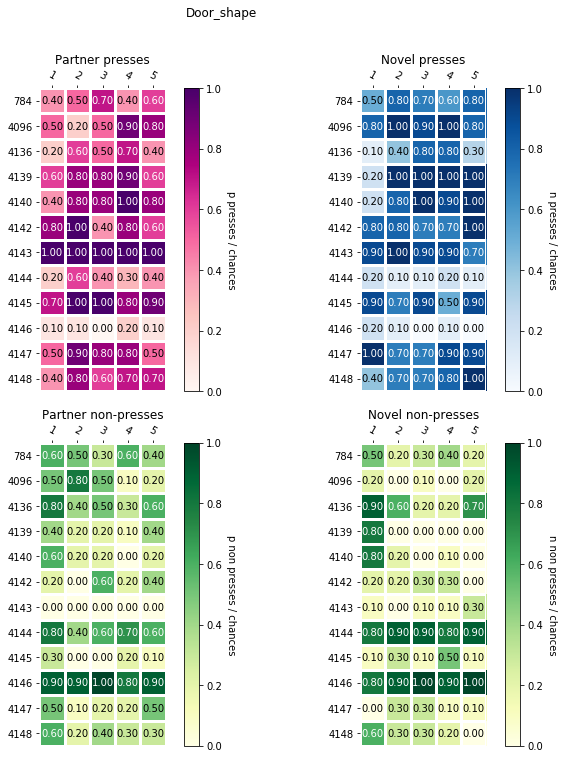

In [17]:

if 'Door_shape' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_shape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses / chances',
                        cmap = 'RdPu')

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,1],
                        title = "Novel presses", 
                        cbarlabel = 'n presses / chances',
                        cmap = 'Blues')

    metric = 'door_1_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,0],
                        title = "Partner non-presses", 
                        cbarlabel = 'p non presses / chances',
                        cmap = 'YlGn')

    metric = 'door_2_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,1],
                        title = "Novel non-presses", 
                        cbarlabel = 'n non presses / chances',
                        cmap = 'YlGn')

    fig.suptitle(experiment, y = 1.05)
    fig.tight_layout()

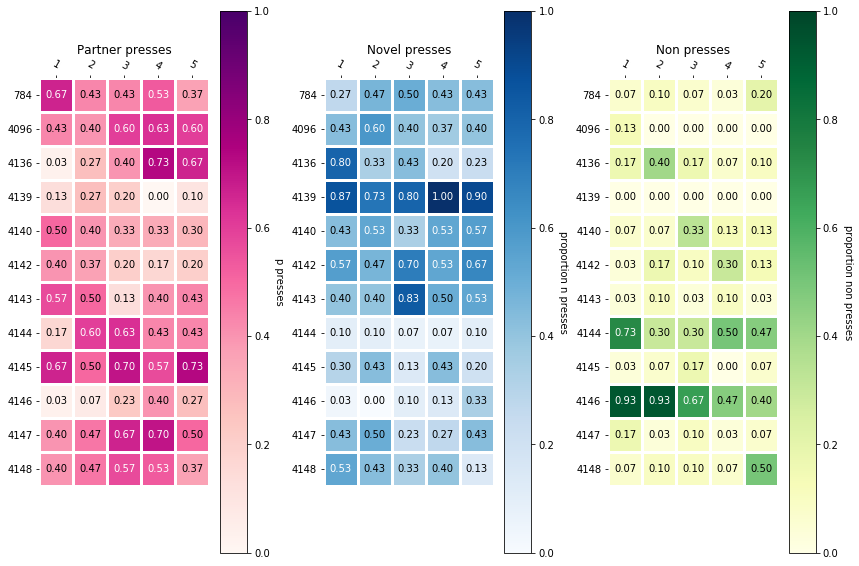

In [18]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_test'

    fig, axs = plt.subplots(ncols = 3, figsize = (12,8))

    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses',
                        cmap = 'RdPu', val_floor = 0, val_ceil = 1)

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_test'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1],
                        title = "Novel presses", 
                        cbarlabel = 'proportion n presses',
                        cmap = 'Blues')

    metric = 'prop_non_presses_by_rounds'
    experiment = 'Door_test'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[2],
                        title = "Non presses", 
                        cbarlabel = 'proportion non presses',
                        cmap = 'YlGn')
    fig.tight_layout()

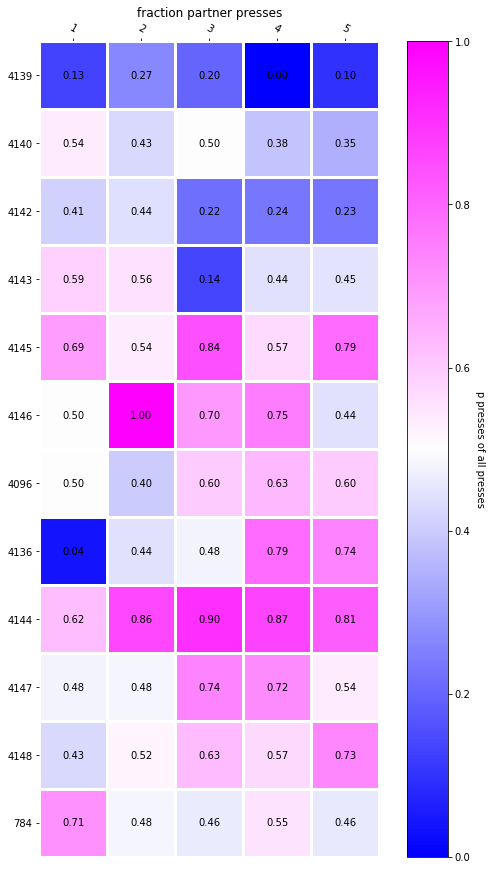

In [13]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_total_press_proportion'
    experiment = 'Door_test'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

In [ ]:
mets

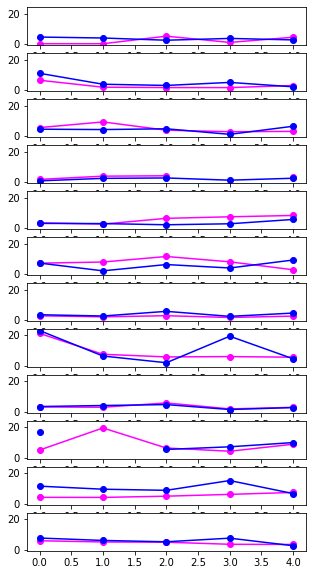

In [ ]:
metric = 'median_door_1_lever_press_latency'
experiment = 'Door_test'

ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)

metric = 'median_door_2_lever_press_latency'
experiment = 'Door_test'

ani2, days2, vals2 = lf.get_data(metric, experiment = experiment, dataset = lon_ana)

fig, ax = plt.subplots(nrows = 12, sharey = True, figsize = (5, 10))
for a, data1, data2 in zip(ax.ravel(), vals, vals2):
    a.plot(data1, 'o-', color = '#ff00ff')
    a.plot(data2, 'o-', color = 'blue')

NameError: name 'vals2' is not defined

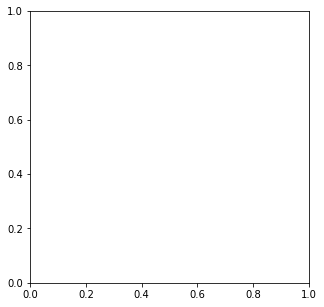

In [40]:
import random

fig, ax = plt.subplots(figsize = (5,5))
ax.boxplot([vals[:,1], vals2[:,1][~np.isnan(vals2[:,1])]], widths = 0.75)
ax.set_xticklabels(('p lever', 'n lever'))
ax.set_title("median lever latency")
ax.set_ylabel('time from lever extension (s)')

xs = [(0.5 - random.random())/2 + 1 for _ in range(12)]
ax.plot(xs, vals[:,1], 'o')

xs = [(0.5 - random.random())/2 + 2 for _ in range(12)]
ax.plot(xs, vals2[:,1], 'o')

ax.set_aspect(0.1)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


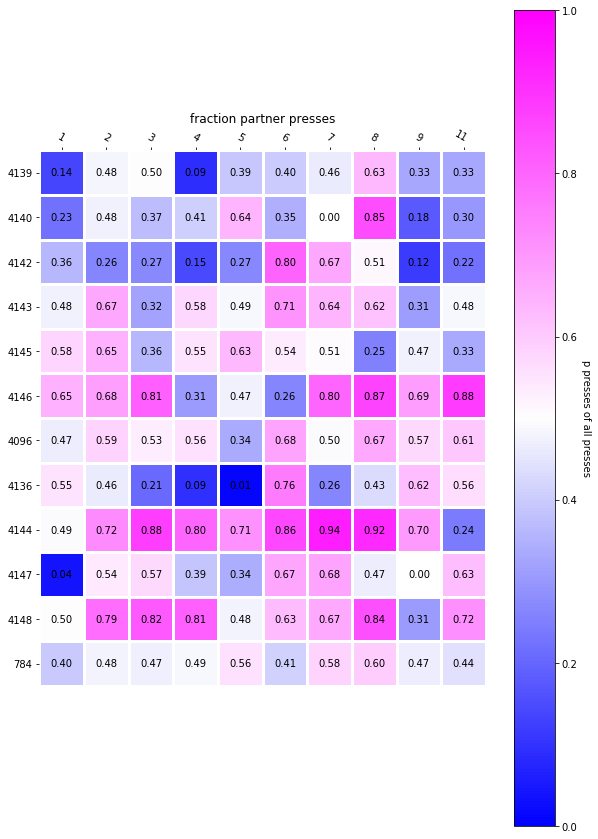

In [14]:
if 'progressive_ratio' in lon_ana.experiments:
    metric = 'door_1_lever_press_count'
    experiment = 'progressive_ratio'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    ani_d1, days, vals_d1 = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    
    metric = 'door_2_lever_press_count'
    ani_d2, days, vals_d2 = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    
    frac = vals_d1 / (vals_d1 + vals_d2)
    
    a = pf.make_heatmap(frac, ani_d1, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


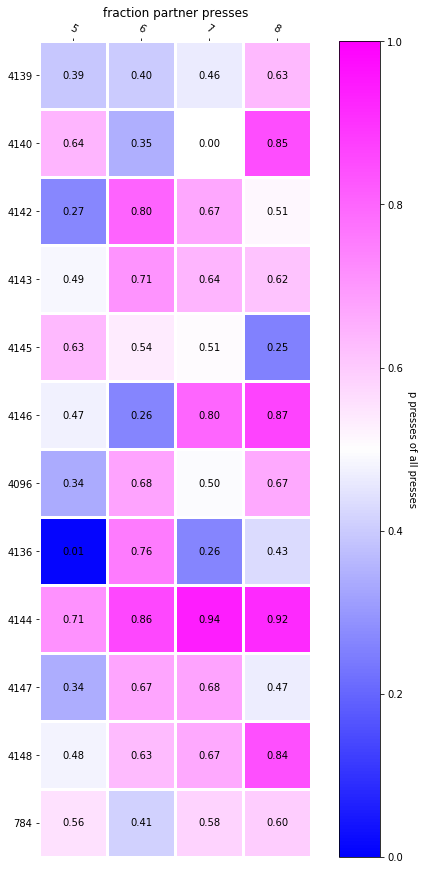

In [16]:
if 'progressive_ratio' in lon_ana.experiments:
    lon_ana.animal_order = animal_order
    metric = 'door_1_lever_press_count'
    experiment = 'progressive_ratio'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    days = [5, 6, 7, 8]
    
    ani_d1, days, vals_d1 = lf.get_data(metric, days = days, experiment = experiment, dataset = lon_ana)
    
    metric = 'door_2_lever_press_count'
    ani_d2, days, vals_d2 = lf.get_data(metric,days = days, experiment = experiment, dataset = lon_ana)
    
    frac = vals_d1 / (vals_d1 + vals_d2)
    
    a = pf.make_heatmap(frac, ani_d1, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


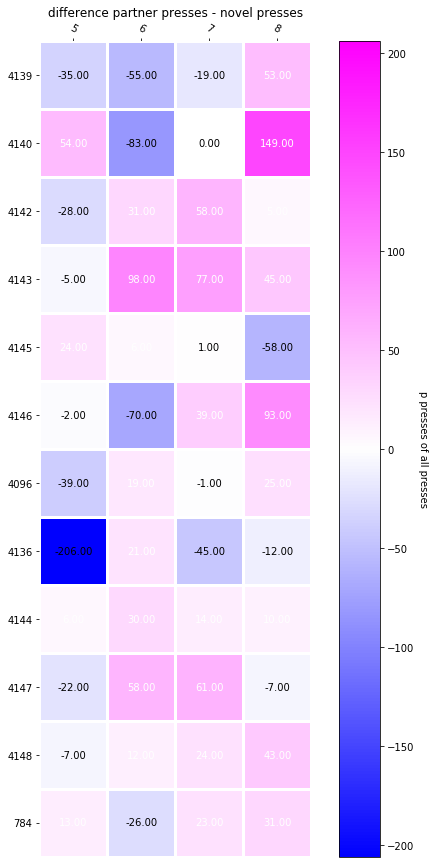

In [39]:
if 'progressive_ratio' in lon_ana.experiments:
    lon_ana.animal_order = animal_order
    metric = 'door_1_lever_press_count'
    experiment = 'progressive_ratio'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    days = [5, 6, 7, 8]
    
    ani_d1, days, vals_d1 = lf.get_data(metric, days = days, experiment = experiment, dataset = lon_ana)
    
    metric = 'door_2_lever_press_count'
    ani_d2, days, vals_d2 = lf.get_data(metric,days = days, experiment = experiment, dataset = lon_ana)
    
    diff = vals_d1 - vals_d2
    max_val = np.abs(diff[~np.isnan(diff)]).max()
    a = pf.make_heatmap(diff, ani_d1, days, ax = ax,
                        title = "difference partner presses - novel presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_ceil=max_val, val_floor=-max_val, threshold = 1)

In [63]:

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as psp
colors = {'male':'lightseagreen', 'female':'mediumpurple'}

In [66]:
def random_jitter_x_values(center:float, number:int , width = 0.5):
    '''return a list with randomly jittered x coordinates. 
    center = x value the distribution should be centered on
    number = number of samples
    width  = width to be covered by distribution'''
    return [(0.5 - random.random())*width/2 + center for _ in range(number)]

In [88]:
experiment = "Door_test"
metric = 'door_1_lever_press_count'



ani, day, d1 = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)

metric = 'door_2_lever_press_count'
ani, day, d2 = lf.get_data(metric = metric, 
                             experiment= experiment,
                             days = [5], dataset = lon_ana)


d1_m, d1_f = d1[:6].flatten(), d1[6:].flatten()
d2_m, d2_f = d2[:6].flatten(), d2[6:].flatten()

fig = psp.make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 0, number = 6, width = 0.3),
    y = d1_m,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {val} presses' for num, val in zip(males, d1_m)]
))

fig.add_trace(go.Box(

    y = d1_m,
    name = 'Male',
    marker_color = colors['male']
))

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 1, number = 6, width = 0.3),
    y = d1_f,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {val} presses' for num, val in zip(females, d1_f)]
))

fig.add_trace(go.Box(

    y = d1_f,
    name = 'Female',
    marker_color = colors['female']
))


###################

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 2, number = 6, width = 0.3),
    y = d2_m,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {val} presses' for num, val in zip(males, d2_m)]
))

fig.add_trace(go.Box(

    y = d2_m,
    name = 'Male',
    marker_color = colors['male'],
))

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 3, number = 6, width = 0.3),
    y = d2_f,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {val} presses' for num, val in zip(females, d2_f)]
))

fig.add_trace(go.Box(

    y = d2_f,
    name = 'Female',
    marker_color = colors['female'],
))

In [113]:
pref_m = d1_m / (d1_m + d2_m)
pref_f = d1_f / (d1_f + d2_f)

fig = psp.make_subplots(cols = 1, rows = 1)
fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 0, number = 6, width = 0.3),
    y = pref_m*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {d1p} p press & {d2p}' for num, d1p, d2p in zip(males, d1_m, d2_m)]
))

fig.add_trace(go.Box(

    y = pref_m*100,
    name = 'Male',
    marker_color = colors['male']
))

fig.add_trace(go.Scatter(
    x = random_jitter_x_values(center = 1, number = 6, width = 0.3),
    y = pref_f*100,
    mode = 'markers',
    marker = {'color':'#000000', 'size':8},
    text = [f'{num}: {d1p} p press & {d2p}' for num, d1p, d2p in zip(females, d1_f, d2_f)]
))

fig.add_trace(go.Box(

    y = pref_f*100,
    name = 'Female',
    marker_color = colors['female']
))


fig.update_layout(
    title='Mutually Exclusive Choice Task Preference',
    width=800,
    height=600,
    plot_bgcolor="white",
    xaxis=dict(linecolor="black"),
    yaxis=dict(linecolor="black"),
    showlegend = False
    )
fig.update_layout(yaxis_range=[0,100])
fig.update_yaxes(title_text = 'Interaction Time (sec)')
fig.add_hline(y=50, x0 = -0.5, x1 = 1.5, line_width=3, line_dash="dash", line_color="red")
fig.show()

In [18]:
ani_d1

['4139',
 '4140',
 '4142',
 '4143',
 '4145',
 '4146',
 '4096',
 '4136',
 '4144',
 '4147',
 '4148',
 '784']